In [1]:
import chess
from IPython.display import SVG, display
import random
from chess import uci
#I-Python module used for SVG display function

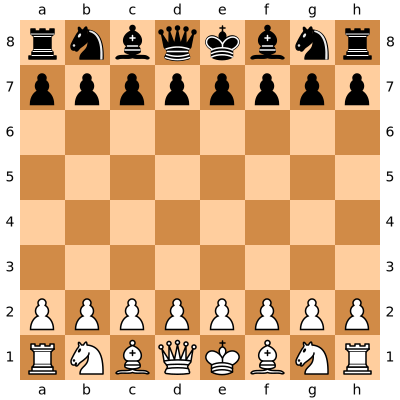

In [2]:
board = chess.Board()
board

In [3]:
board.turn

True

In [4]:
#Detects end_game criteria due to checkmate, stalemate, insufficient material etc.
def check_end_game():
    if board.is_game_over():
        print "Game Over."
    else:
        print "Continue..."

check_end_game()

Continue...


In [ ]:
#Determines the moves which are legal to play - this is printed
print board.legal_moves

#allows the player to move and checks if this move is legal. Play continues until the criteria board.is_game_over() 
#becomes True
def player_movement():
    player_move = raw_input('What move would you like to play?')
    player_move = chess.Move.from_uci(player_move)
    #need to fix this so it reads the player move properly - currently reads the whole user input which doesn't match the legalmovegenerator
    if player_move in board.legal_moves:
        board.push(player_move)
        #print (board)
        print board.legal_moves
        print len(board.legal_moves)
        #displays board as an svg image
        display(SVG(chess.svg.board(board=board, size = 500)))

    #This section will work to determine if the move requested is in the list - which currently throws the error
    # xx is not in list 
    #if player_move in board.legal_moves == False:
    #    print "False move - try again - error - move not in list"
    #    move_chess_piece()

    else:
        print "False move - try again"
        print board
        move_chess_piece()
    print board
    chess.Board()
        
        
def computer_movement():
    moveList = list(board.legal_moves)
    print(moveList)
    #moveIdx = random.randInt(0, len(list(board.legal_moves)));
    #print(board.legal_moves[moveIdx])
    chosen_move = random.choice(moveList)
    print chosen_move
    print type(chosen_move)
    board.push(chosen_move)
    display(SVG(chess.svg.board(board=board, size = 500)))
    
while board.is_game_over() == False:
    computer_movement()
    computer_movement()
    if board.is_game_over() == True:
        print 'Game Over'
        break

player_movement()

In [ ]:
#Test for computer movement code
def computer_movement():
    print board.legal_moves
    moveList = list(board.legal_moves)
    print(moveList)
    #moveIdx = random.randInt(0, len(list(board.legal_moves)));
    #print(board.legal_moves[moveIdx])
    
    print(random.choice(moveList))
    
computer_movement()

In [ ]:
#player_movement()
#Test for generic stuff
def generatedList():
    for i in range(10):
        yield i
        
        
numList = [1,2,3]
for num in numList:
    print(num)

for index, num in enumerate(numList):
    print("%d = %d" % (index, num))
    

for i in generatedList():
    print(i)
    
#print(len(generatedList()))
print(len(list(generatedList())))

In [ ]:
#had to do pip install futures to ensure this works
engine = chess.uci.popen_engine("/Users/harvinderpower/Downloads/stockfish-8-mac/Mac/stockfish-8-64")
engine.uci()
engine.name
engine.author

<LegalMoveGenerator at 0x10451c890 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>
What move would you like to play?g2g4
<LegalMoveGenerator at 0x10451c890 (Nh6, Nf6, Nc6, Na6, h6, g6, f6, e6, d6, c6, b6, a6, h5, g5, f5, e5, d5, c5, b5, a5)>
20


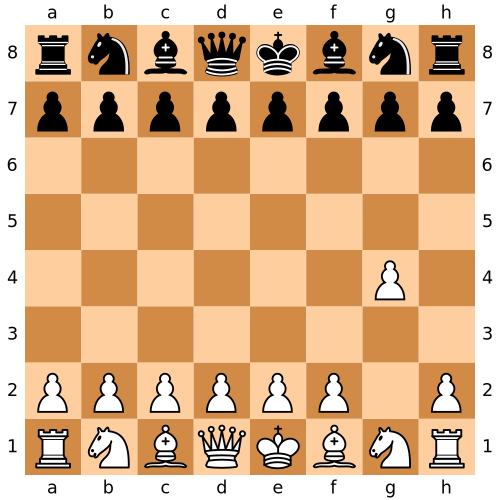

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . P .
. . . . . . . .
P P P P P P . P
R N B Q K B N R


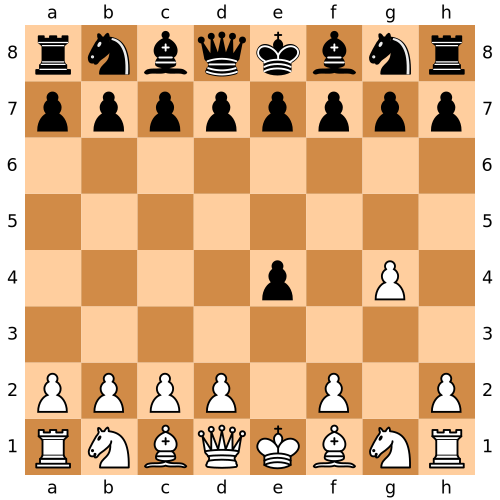

What move would you like to play?b8b7
False move - try again
<LegalMoveGenerator at 0x10451c890 (Nh3, Nf3, Ne2, Ba6, Bb5, Bc4, Bh3, Bd3, Bg2, Be2, Ke2, Qf3, Qe2, Nc3, Na3, g5, h3, f3, d3, c3, b3, a3, h4, f4, d4, c4, b4, a4, fxe3, dxe3)>
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . p . P .
. . . . . . . .
P P P P . P . P
R N B Q K B N R
What move would you like to play?Nh3


ValueError: expected uci string to be of length 4 or 5: 'Nh3'

In [6]:
#Determines the moves which are legal to play - this is printed
engine = chess.uci.popen_engine("/Users/harvinderpower/Downloads/stockfish-8-mac/Mac/stockfish-8-64")
engine.uci()
board.reset()
print board.legal_moves

#allows the player to move and checks if this move is legal. Play continues until the criteria board.is_game_over() 
#becomes True
def player_movement():
    player_move = raw_input('What move would you like to play?')
    player_move = chess.Move.from_uci(player_move)
    #need to fix this so it reads the player move properly - currently reads the whole user input which doesn't match the legalmovegenerator
    if player_move in board.legal_moves:
        board.push(player_move)
        #print (board)
        print board.legal_moves
        print len(board.legal_moves)
        #displays board as an svg image
        display(SVG(chess.svg.board(board=board, size = 500)))

    #This section will work to determine if the move requested is in the list - which currently throws the error
    # xx is not in list 
    #if player_move in board.legal_moves == False:
    #    print "False move - try again - error - move not in list"
    #    move_chess_piece()

    else:
        print "False move - try again"
        print board.legal_moves
        print board
        player_movement()
    print board
    chess.Board()
        
        
def computer_movement():
    #moveList = list(board.legal_moves)
    #print(moveList)
    #computed_move = engine.go(movetime=5000)[0]
    board.push(engine.go(movetime=5000)[0])
    ##moveIdx = random.randInt(0, len(list(board.legal_moves)));
    ##print(board.legal_moves[moveIdx])
    #chosen_move = random.choice(moveList)
    #print chosen_move
    #print type(chosen_move)
    #board.push(chosen_move)
    display(SVG(chess.svg.board(board=board, size = 500)))
    
while board.is_game_over() == False:
    player_movement()
    computer_movement()
    if board.is_game_over() == True:
        print 'Game Over'
        break